In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv("./exercise_dataset.csv")

In [113]:
# Check the first few rows
print(data.head())

   ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3  


In [114]:
# Get information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB
None


In [115]:
# Check for missing values
print(data.isnull().sum())

ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64


In [116]:
# Descriptive statistics
print(data.describe())

                ID  Calories Burn  Dream Weight  Actual Weight          Age  \
count  3864.000000    3864.000000   3864.000000    3864.000000  3864.000000   
mean   1932.500000     301.861806     75.139263      75.188440    39.621118   
std    1115.585048     115.828604     14.545824      14.845511    12.521721   
min       1.000000     100.009403     50.001984      45.783747    18.000000   
25%     966.750000     202.168837     62.373585      62.476906    29.000000   
50%    1932.500000     299.742508     75.522136      75.544407    40.000000   
75%    2898.250000     404.143688     87.707989      88.105767    51.000000   
max    3864.000000     499.859262     99.985355     104.309600    60.000000   

          Duration   Heart Rate          BMI  Exercise Intensity  
count  3864.000000  3864.000000  3864.000000         3864.000000  
mean     40.190994   139.777950    26.801977            5.457298  
std      11.765957    23.447528     4.746745            2.850896  
min      20.000000  

In [117]:
# Create a DataFrame
df = pd.DataFrame(data)

# Get a list of categorical columns
categorical_cols = ['Exercise', 'Gender', 'Weather Conditions']

# One-hot encode the categorical columns
data = pd.get_dummies(data, columns=categorical_cols)
data = data.astype(int)

print(data.head())

   ID  Calories Burn  Dream Weight  Actual Weight  Age  Duration  Heart Rate  \
0   1            286            91             96   45        37         170   
1   2            343            64             61   25        43         142   
2   3            261            70             71   20        20         148   
3   4            127            79             82   33        39         170   
4   5            416            89             85   29        34         118   

   BMI  Exercise Intensity  Exercise_Exercise 1  ...  Exercise_Exercise 5  \
0   29                   5                    0  ...                    0   
1   21                   5                    0  ...                    0   
2   27                   4                    0  ...                    0   
3   33                  10                    0  ...                    1   
4   23                   3                    0  ...                    0   

   Exercise_Exercise 6  Exercise_Exercise 7  Exercise_Ex

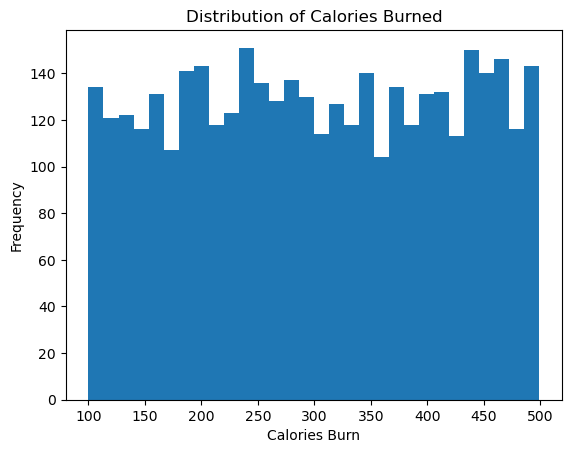

In [118]:
# Histogram of calories burned
plt.hist(data['Calories Burn'], bins=30)
plt.xlabel('Calories Burn')
plt.ylabel('Frequency')
plt.title('Distribution of Calories Burned')
plt.show()

In [125]:
# Select relevant features
X = data.drop('Calories Burn', axis=1)  # Features
y = data['Calories Burn']  # Target variable

In [126]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# Create the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 13268.331597516872


In [130]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 115.18824418106594
